# NLP21@BGU.CS - HW1

## Michael Elhadad michael.elhadad@example.com
### NLP 2021 - HW1 (http://www.cs.bgu.ac.il/~elhadad/nlp21/hw1.html)

Nov 2020

In [2]:
# Boring preliminaries
%pylab inline
import re
import math
import string
from collections import Counter
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


<h2>Content</h2>

* <a href="#P1">Part 1: Language Models</a>
  * <a href="#data">1.1 Data Exploration</a>
    * <a href="#explore">1.1.1 Gathering basic statistics</a>
    * <a href="#power">1.1.2 Zipf and Power Law</a>
  * <a href="#ngram">1.2 n-gram model</a>
    * <a href="#n_parameters">1.2.1 How much memory do you expect a model to occupy?</a>
    * <a href="#train_lm">1.2.2 N-gram Word LM</a>
  * <a href="#eval">1.3 Language Model Evaluation</a>
    * <a href="#per">1.3.1 Perplexity</a>
    * <a href="#smoothing">1.3.2 Smoothing</a>
    * <a href="#overfit">1.3.3 Perplexity according to the order of the n-gram model
    * <a href="#test-lm">1.3.4 Test the best n-gram LM</a>
    * <a href="#gen">1.3.5 Generating Text using Language Models</a>
  * <a href="#nn-lm">1.4 Character language model</a>
    * <a href="#effectiveness">1.4.1 Read and Summarize</a>
    * <a href="#recipes">1.4.2 Recipes with a Character LM</a>
* <a href="#P2">Part 2: Polynomial curve fitting</a>
  * <a href="#syntheticdata">2.1 Synthetic data generation</a>
  * <a href="#curvefitting">2.2 Polynomial Curve Fitting</a>
  * <a href="#regularization">2.3 Polynomial Curve Fitting with Regularization</a>
  * <a href="#prob-regr">2.4 Probabilistic Regression Model</a>
* <a href="#P3">Part 3: Text Classification with Character RNN</a>
  * <a href="#readtut">3.1 Summarize the PyTorch Tutorial</a>
  * <a href="#newdata">3.2 Explore the Cities Dataset</a>
  * <a href="#citiesmodel">3.3 Train and Evaluate the RNN Model for Cities</a>
  * <a href="#bettercitiesmodel">3.4 (Optional) Improve the Model</a>

<hr>
<a name="P1"></a>
<h2>Part 1: Language Models</h2>

<a name="data"></a>
<h3>1.1 Data Exploration</h3>

<a name="explore"></a>
<h4>1.1.1 Gathering Basic Statistics</h4>

In this section, we collect and plot the following information on a text dataset:
<ul>
<li>The total number of tokens</li>
<li>The total number of characters</li>
<li>The total number of distinct words (vocabulary)</li>
<li>The total number of tokens corresponding to the top-N most frequent words in the vocabulary</li>
<li>The token/type ratio in the dataset</li>
<li>The number of types that appear in the dev data but not the training data</li>
<li>The average number and standard deviation of characters per token</li>
<li>The total number of distinct n-grams (of words) that appear in the dataset for n=2,3,4.</li>
<li>The total number of distint n-grams of characters that appear for n=2,3,4,5,6,7.</li>
</ul>

We operate on the PTB dataset, which contains 929k training words, 73k validation words, and 82k test words. 
It is formatted in such a way that only the top 10k most frequent words are in its vocabulary.

We gather the files from <a href="http://www.fit.vutbr.cz/~imikolov/rnnlm/simple-examples.tgz">the dataset</a>
where sentences are segmented one per line and words separated by spaces.  We assume the files are located in "../data/".

#### Tokenizing

You may need to tokenize strings read from the dataset files into lists of tokens.  

Think which method is best appropriate for this dataset given the way it is formatting.
Recall the method based on regular expressions used in Norvig's piece.
Compare it with the the tokenizer provided in the nltk library.

In [3]:
import nltk

text = "Won't this be tokenized, the way PTB expects it to be."
tokens = nltk.word_tokenize(text)

print("We found %s tokens" % (len(tokens)))

We found 14 tokens


The output of justext is organized in paragraphs.  We converted them as one line of text each.

Note how abbreviations in English are tokenized in PTB ("I'm" becomes ["I", "'m"]) and numbers are all replaced by the "N" special token.

<a name="power"></a>
<h4>1.1.2 Zipf and Power Law</h4>

Word count distributions are said to follow <a href="https://en.wikipedia.org/wiki/Power_law">power law distributions</a>. 
In practice, this means that a plot of the log-frequency against the log-rank is nearly linear. 
We will verify that this holds for the Penn Treebank dataset by constructing the appropriate corpus_counts counter:


In [6]:
## Update this...
corpus_counts = Counter(tokens)

3.3.2


Text(0, 0.5, 'frequency')

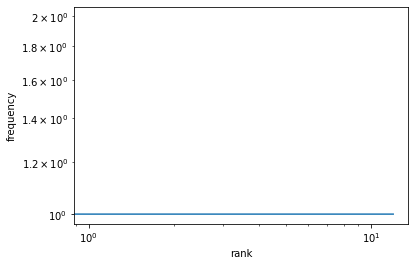

In [7]:
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)

plt.loglog([val for word,val in corpus_counts.most_common(4000)])
plt.xlabel('rank')
plt.ylabel('frequency')

<a name="ngram"></a>
<h3><a name="ngram">1.2 n-gram Word Language Model</a></h3>

<a name="n_parameters"></a>
<h4>1.2.1 How much memory do you expect a model to occupy?</h4>


<a name="train_lm"></a>
<h4>1.2.2 N-gram LM</h4>

We present a Python function to construct a word n-gram model given a dataset according to the signature:
<pre>
train_word_lm(dataset, n=2)
</pre>

In [10]:
## Adjust this code to work on words 

def create_lm(fname, order=4):
    with open(fname) as f:
        data = f.read()
    pad = '*' * order
    data = pad + data
    cfd = nltk.ConditionalFreqDist((data[i : i + order], data[i + order]) for i in range(len(data) - order))
    cpd = nltk.ConditionalProbDist(cfd, nltk.MLEProbDist)
    return cpd

def test_create_lm():
    order = 4
    lm = create_lm('../data/shakespeare.txt', order)
    return lm

def test_generate_from_lm(lm):
    out = []
    hist = '*' * order
    for _ in range(1000):
        letter = lm[hist].generate()
        hist = hist[1:] + letter
        out.append(letter)
    print(''.join(out))

Provide:
* The list of methods of the object cpd that are useful for a language model (inherited or implemented by the various classes in nltk)
* Explain how the function generate() used in the sample works - why does it compute a correct way to sample from a distribution?


<a name="eval"></a>
<h3>1.3 Language Model Evaluation</h3>

We now evaluate the performance of the learned language models by using two techniques:
measuring perplexity on a validation dataset and using the model to generate random text, then assessing
the readability of the generated text.

<a name="per"></a>
<h4>1.3.1 Perplexity</h4>

We implement a Python function to measure the perplexity of a trained model on a test dataset.

In [11]:
# We adapt the methods to compute the cross-entropy and perplexity of a model from nltk.model
# to our implementation
def perplexity(lm):
    return 1.0

In [12]:
# We now measure the reported perplexity values on the Penn Treebank validation dataset ptb.valid.txt


Analyze the observed result...

<a name="smoothing"></a>
<h4>1.3.2 Smoothing</h4>

In order to improve the model, we will use a smoothing technique.

We use the <a href="http://www.nltk.org/_modules/nltk/probability.html">nltk probability distribution</a> module which provides different estimators that implement smoothing methods (Laplace, Lidstone, Witten-Bell, Good-Turing). 

In [15]:
# We change the model to use a different estimator than the Maximum Likelihood Estimator (MLE) count-based estimator
# to compute the probability of p(w|history).  

def create_lm_smooth(fname, order=4, moreParam=None):
    return 1.0


Compare the obtained perplexity of the trained model on the validation dataset for different Lidstone estimators for a 
variety of hyper-parameter gamma $0 \leq gamma \leq 1$ by drawing a graph of the obtained perplexity on the validation dataset for different values of gamma.


In [16]:
# Draw graph of perplexity of bigram LM for values of gamma with Lidstone estimator as smoothing method

<a name="overfit"></a>
<h4>1.3.3 Perplexity according to the order of the n-gram model</h4>

Another way to improve the model is to use an n-gram model with increasing values of n (2,3,...10).

In [17]:
# Draw a graph of the obtained perplexity on the validation dataset for different values of n between 2 and 20
# for the best value of gamma obtained above.


<a name="test-lm"></a>
<h4>1.3.4 Test the best n-gram LM</h4>

Based on the 2 graphs above, we hypothesize that the best combination LM is an n-gram of order NN smoothed with Lidstone estimator with parameter gamma = GG.

We test this model on the test dataset of the Penn Treebank and obtain the following perplexity on the validation set:

In [18]:
## Test LM with optimal parameters - report perplexity on validation.

We also test our n-gram model with the <a href="https://www.nltk.org/api/nltk.html#nltk.probability.SimpleGoodTuringProbDist">Good-Turing estimator instead of the Lidstone estimator.

In [19]:
## Test LM with Good-Turing estimator - report perplexity.

To assess the success of these LMs, we compare our result with a set of baselines:
* the expected results on a uniform distribution of words (worst case) 
* recent research results reported in research paper on language models that you can find in Google Scholar tested on the Penn Treebank dataset.

<a name="gen"></a>
<h4>1.3.5 Generating Text from a Language Model</h4>

Another way to evaluate a language model is to use the model in a generative manner - that is, to randomly sample
sentences starting from a seed prefix, and generating each next word by sampling from the model distribution $p(w | prefix)$.

Discuss ways to decide when the generation should stop.

In [48]:
# Define generate(model, seed) 

# Test generate it on the best model trained above

When we sample from the LM given a history, we do not pick the most likely word generated by the LM, otherwise the generator would be deterministic.  Instead, we use <a href="https://www.nltk.org/api/nltk.html#nltk.probability.ProbDistI.generate">nltk.ProbDistI.generate()</a>.  
* Explain what is expected from this method of text generation.

We experiment with a variety of seeds.  

We first test the case where ....

Then the case where ....

Analyze your observations.

<h4>Optional material</h4>

One way to control the variety of the text generated by an LM is to introduce a parameter called the <i>temperature</i>
of the generator which allows us to sample words randomly according to the distribution produced by the LM (that is, we do not 
always select the most likely candidate - we sample from the distribution produced by the LM).  
    
<a href="https://nlp.stanford.edu/blog/maximum-likelihood-decoding-with-rnns-the-good-the-bad-and-the-ugly/">Maximum Likelihood Decoding with RNNs - the good, the bad, and the ugly</a> by Russell Stewart (2016) explains how a temperature argument can control the level of variability generated by the model.  

The idea is ... (summarize the post).

<a href="https://github.com/sameersingh/uci-statnlp/blob/master/hw2/generator.py">generator.py</a> from Sameer Sing demonstrates a method to generate from a LM with a temperature parameter.  

Explain how the code in this method corresponds to the mathematical explanation provided in the blog above.

<a name="nn-lm"></a>
<h3>1.4 Character language model</h3>

It is interesting to compare word-based and character-based language models.
On the one hand, character-based models need to predict a much smaller range of options (one character out of ~100 possible characters vs. one word out of 200K possible words - or 10K in the example we reviewed above).  
On the other hand, we need to maintain a much longer history of characters to obtain a significant memory of the context which would make sense semantically.


<a name="effectiveness"></a>
<h4>1.4.1 Read and Summarize</h4>

<a href="http://karpathy.github.io/2015/05/21/rnn-effectiveness/">The Unreasonable Effectiveness of Recurrent Neural Networks</a>, May 21, 2015, Andrej Karpathy (up to Section "Further Reading").  
Write a summary of this essay of about 200 words highlighting what is most surprising in the experimental results reported in the blog.
Refer to what you know about formal languages and Chomsky's hierarchy.


Read the follow-up article:
<a href="http://nbviewer.jupyter.org/gist/yoavg/d76121dfde2618422139">The unreasonable effectiveness of Character-level Language Models (and why RNNs are still cool)</a>, Sept 2015, Yoav Goldberg.  
Write a summary of this essay of about 200 words.

<a name="recipes"></a>
<h4>1.4.2 Recipes with a Character LM</h4>

Strikingly realistic output can be generated when training a character language-model on a strongly-constrained genre of text like cooking recipes.
Train your n-gram model on the dataset provided in 
<a href="https://gist.github.com/nylki/1efbaa36635956d35bcc">do androids dream of cooking?</a> which contains about 32K recipes gathered from the Internet.

Gather the recipes dataset and prepare a dataset reader according to the structure of the files.

Report basic statistics about the dataset (number of recipes, tokens, characters, vocabulary size, distribution of the size of recipes in words and in chars, distribution of length of words).

Split the dataset into training, dev and test as a 80%/10%/10% split.  Provide a Python interface to access the split conveniently.

Choose the order of the char n-gram according to the indications given in Yoav Goldberg's article.  
Justify the choice (you should use the dev test for this).

Train a char language model using your LM mode adapted to work on characters instead of words.

Report on the perplexity of the trained language model.  Comment on the value you observe compared to the perplexity of the word LM model obtained above.

Sample about 5 generated recipes from the trained language model.

Write 3 to 5 observations about the generated samples.

<hr>
<hr>
<a name="P2"></a>
<h2>Part 2: Polynomial Curve Fitting</h2>

We reproduce the polynomial curve fitting example used in Bishop's <a href="https://www.microsoft.com/en-us/research/people/cmbishop/#!prml-book">book</a> in Chapter 1.  

<a name="syntheticdata"></a>
<h3>2.1 Synthetic Dataset Generation</h3>

We generate a dataset of points in the form of 2 vectors $x$ and $t$ of size $N$ where:

$t_i = y(x_i) + \mathcal{N}(\mu, \sigma)$

where:
* The $x_i$ values are equi-distant on the $[0 \dots 1]$ segment (that is, $x_1 = 0, x_2=\frac{1}{N-1}, x_3=\frac{2}{N-1}..., x_N = 1.0$)
* $\mu = 0.0$
* $\sigma = 0.03$ 
* $y(x) = sin(2\pi \times x)$

In [25]:
# Learn the function y given the generated noisy dataset
def generateDataset(N, f, sigma):
    return 1.0

Draw the plot (scatterplot) of (x,t) using matplotlib for N=100.
* Look at the documentation of the <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal">numpy.random.Generator.normal</a> function in Numpy for an example of usage.
* Look at the definition of the function <a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace">numpy.linspace</a> to generate your dataset.


In [28]:
import math
import numpy as np
def s(x): return x**2
def f(x): return math.sin(2 * math.pi * x)
vf = np.vectorize(f)        # Create a vectorized version of f

z = np.array([1,2,3,4])
print(z)

sz = s(z)                   # You can apply simple functions to an array
print(sz.shape)             # Same dimension as z (4)
print(sz)

fz = vf(z)                  # For more complex ones, you must use the vectorized version of f
print(fz.shape)
print(fz)

[1 2 3 4]
(4,)
[ 1  4  9 16]
(4,)
[-2.44929360e-16 -4.89858720e-16 -7.34788079e-16 -9.79717439e-16]


<a name="curvefitting"></a>
<h3>2.2 Polynomial Curve Fitting</h3>

We will attempt to learn the function y given a synthetic dataset $(x, t)$.

We assume that $y$ is a polynomial of degree $M$ - that is:

$y(x) = w_0 + w_1 x + w_2 x^2 + ... + w_M x^M$

Our objective is to estimate the vector $w = (w_0 \dots w_M)$ from the dataset $(x, t)$.

In [30]:
import numpy as np
import scipy.linalg

t = np.array([1,2,3,4])                    # This is a vector of dim 4
t.shape                                    # (4,)
phi = np.array([[1,1],[2,4],[3,3],[2,4]])  # This is a 4x2 matrix
phi.shape                                  # (4, 2) 
prod = np.dot(phi.T, phi)                  # prod is a 2x2 matrix
prod.shape                                 # (2, 2)
i = np.linalg.inv(prod)                    # i is a 2x2 matrix
i.shape                                    # (2, 2)
m = np.dot(i, phi.T)                       # m is a 2x4 matrix
m.shape                                    # (2, 4)
w = np.dot(m, t)                           # w is a vector of dim 2
w.shape                                    # (2,)

(2,)

We implement a method <b>optimizeLS(x, t, M)</b> which given the dataset $(x, t)$ returns the optimal polynomial of degree $M$ that approximates the dataset according to the least squares objective. 

We now plot the learned polynomial $w_M(x_i)$ and the real function $sin(2πx)$ for a dataset of size $N=10$ and $M=1,3,5,10$.


<a name="regularization"></a>
<h3>2.3 Polynomial Curve Fitting with Regularization</h3>

We observe in the plot above that the solution to the least-squares optimization has a tendency to over-fit the dataset.

To avoid over-fitting, we will use <i>regularization</i>: the objective function we want to optimize will take into account the least-squares error as above, and in addition the complexity of the learned model $w$.

We write a function <b>optimizePLS(x, t, M, lambda)</b> which returns the optimal parameters $w_{PLS}$ given $M$ and $\lambda$.

In [34]:
def optimizePLS(x, t, M, lamb):
    return 1.0

We want to optimize the value of λ. The way to optimize is to use a development set in addition to our training set.

To construct a development set, we extend our synthetic dataset construction function to return 3 samples:
* one for training, 
* one for development 
* and one for testing

In [35]:
def generateDataset3(N, f, sigma):
    return 1.0

Given a synthetic dataset, we optimize for the value of λ by varying the value of log(λ) from -40 to -20 on the development set. 

In [36]:
def optimizePLS2(xt, tt, xv, tv, M):
    return 1.0

In [37]:
# Draw the plot of the normalized error of the model for the training, 
# development and test for the case of $N = 10$ and the case of $N=100$. 

Analyze the plots

<a name="prob-regr"></a>
<h3>2.4 Probabilistic Regression Framework</h3>

We now consider the same problem of regression (learning a function from a dataset) formulated in a probabilistic framework.

In [39]:
def bayesianEstimator(x, t, M, alpha, sigma2):
    return 1.0

We draw the plot of the original function $y = sin(2πx)$ over the range $[0 \dots 1]$, the mean of the predictive distribution $m(x)$ and the confidence interval $m(x) - \sqrt{var(x)}$ and $m(x) + \sqrt{var(x)}$ (that is, one standard deviation around each predicted point) for the values:
* $\alpha = 0.005$
* $\sigma^2 = 1/11.1$
* $M = 9$

over a synthetic dataset of size $N=10$ and $N=100$.

In [40]:
## Draw the plot

Interpret the height of the band around the most likely function in terms of the distribution of the xs in your synthetic dataset.
Can you think of ways to make this height very small in one segment of the function and large in another?

<hr/>
<hr/>
<a name="P3"></a>
<h2>Part 3: Neural Models for Classification</h2>

In this section, we adopt the PyTorch tutorial on 
<a href="https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html">Character RNN for classification</a>
to a different dataset.

<a name="readtut"></a>
<h3>3.1 Summarize the Tutorial</h3>

We summarize the <a href="https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html">PyTorch tutorial</a>:
* task
* method
* data encoding
* loss function 
* evaluation method

(Reading <a href="https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html">PyTorch Tensor Tutorial</a> helps)

<a name="newdata"></a>
<h3>3.2 Explore City Names Dataset</h3>

We use a dataset on city names in different countries to train a classifier.

The data from <a href="cities_val.zip">cities_val.zip</a> (validation) and <a href="cities_train.zip">cities_train.zip</a> (training)
is under "../data/cities/val" and "../data/cities/train".


In [43]:

import codecs
import math
import random
import string
import time
import numpy as np
from sklearn.metrics import accuracy_score

'''
Don't change these constants for the classification task.
You may use different copies for the sentence generation model.
'''
languages = ["af", "cn", "de", "fi", "fr", "in", "ir", "pk", "za"]
all_letters = string.ascii_letters + " .,;'"


import unicodedata

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

# print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = codecs.open(filename, "r",encoding='utf-8', errors='ignore').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

Explore the train dataset by computing basic descriptive statistics:
number of categories, tokens per category, number of characters, distinct characters, average number of characters per token.

Explain why the unicodeToAscii is a good idea for this task.

In [44]:
# Compute statistics over cities dataset

In [45]:
# Draw plots

<a name="citiesmodel"></a>
<h3>3.3 Train a Model and Evaluate It</h3>

Adopt the code of the PyTorch tutorial to run on this new dataset.

Report on performance in a similar manner.  Explain the main confusion cases observed in the confusion matrix.

<a name="bettercitiesmodel"></a>
<h3>3.4 Improve the RNN Model (Optional)</h3>

Explore methods to improve performance of the cities classifier.
Use a character RNN, dropout, better initialization.

Report on error reduction.